In [1]:
import yaml
import wandb
import numpy as np
import pandas as pd
import seaborn as sns
import pandas_profiling
import matplotlib.pyplot as plt

sns.set()

In [2]:
with open("../../config.yaml", "r") as file:
    config = yaml.safe_load(file)

In [4]:
run = wandb.init(project=config['main']['project_name'], 
                 group=config['main']['experiment_name'], 
                 job_type="EDA", save_code=True)

wandb: Currently logged in as: ibrahimsherif (use `wandb login --relogin` to force relogin)
wandb: wandb version 0.12.2 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


In [5]:
artifact = run.use_artifact("nyc_airbnb/raw_data.csv:latest")
df = pd.read_csv(artifact.file())
df['last_review'] = pd.to_datetime(df['last_review'])

df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,9138664,Private Lg Room 15 min to Manhattan,47594947,Iris,Queens,Sunnyside,40.74271,-73.92493,Private room,74,2,6,2019-05-26,0.13,1,5
1,31444015,TIME SQUARE CHARMING ONE BED IN HELL'S KITCHEN...,8523790,Johlex,Manhattan,Hell's Kitchen,40.76682,-73.98878,Entire home/apt,170,3,0,NaT,NaN,1,188
2,8741020,Voted #1 Location Quintessential 1BR W Village...,45854238,John,Manhattan,West Village,40.73631,-74.00611,Entire home/apt,245,3,51,2018-09-19,1.12,1,0
3,34602077,Spacious 1 bedroom apartment 15min from Manhattan,261055465,Regan,Queens,Astoria,40.76424,-73.92351,Entire home/apt,125,3,1,2019-05-24,0.65,1,13
4,23203149,Big beautiful bedroom in huge Bushwick apartment,143460,Megan,Brooklyn,Bushwick,40.69839,-73.92044,Private room,65,2,8,2019-06-23,0.52,2,8


In [6]:
profile = pandas_profiling.ProfileReport(df, title="Pandas Profiling Report")
profile.to_widgets()

Summarize dataset:   0%|          | 0/29 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

### Exploratory Data Analysis

#### Numerical data

In [7]:
df.describe(datetime_is_numeric=True)

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,2.000000e+04,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,15877,15877.000000,20000.000000,20000.000000
mean,1.892380e+07,6.746034e+07,40.728455,-73.952125,153.269050,6.992100,23.274100,2018-10-02 13:13:30.606537728,1.377446,6.955450,112.901200
min,2.539000e+03,2.571000e+03,40.508730,-74.239140,0.000000,1.000000,0.000000,2011-05-12 00:00:00,0.010000,1.000000,0.000000
25%,9.393540e+06,7.853718e+06,40.689420,-73.983030,69.000000,1.000000,1.000000,2018-07-01 00:00:00,0.190000,1.000000,0.000000
50%,1.952117e+07,3.111431e+07,40.722730,-73.955640,105.000000,2.000000,5.000000,2019-05-19 00:00:00,0.720000,1.000000,44.000000
75%,2.912936e+07,1.068426e+08,40.762990,-73.936380,175.000000,5.000000,23.000000,2019-06-23 00:00:00,2.010000,2.000000,229.000000
max,3.648561e+07,2.742733e+08,40.913060,-73.717950,10000.000000,1250.000000,607.000000,2019-07-08 00:00:00,27.950000,327.000000,365.000000
std,1.101223e+07,7.857936e+07,0.054755,0.046559,243.325609,21.645449,44.927793,NaN,1.683006,32.433831,131.762226


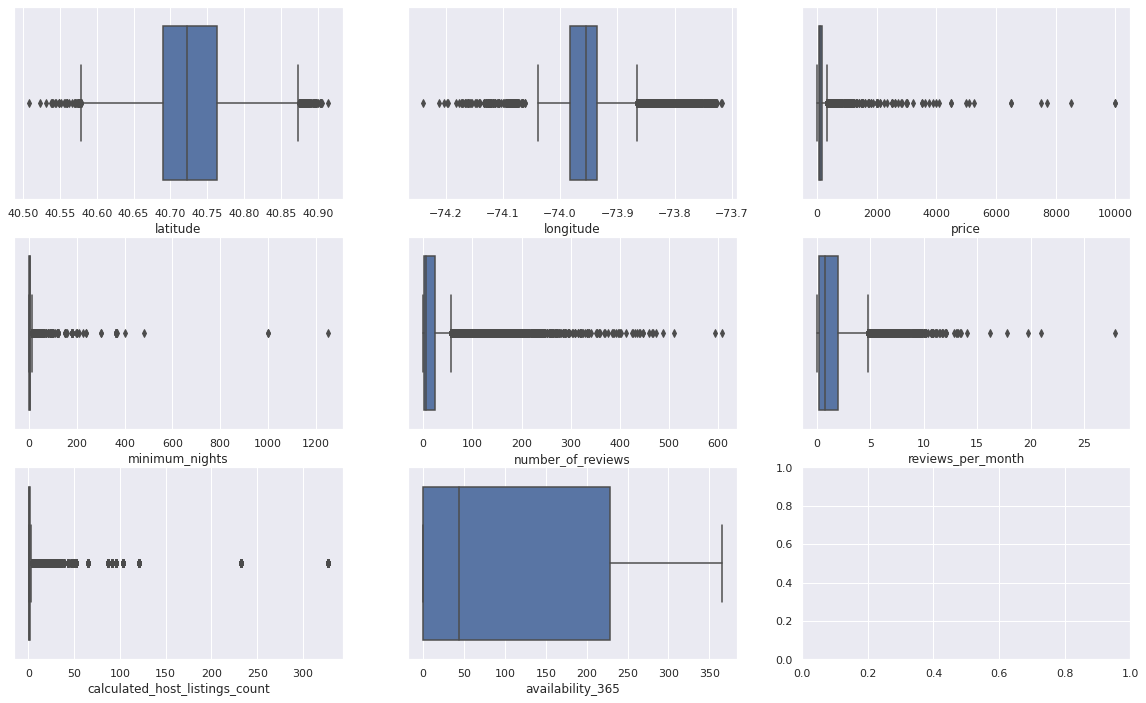

In [8]:
ROWS = 3
COLS = 3

numeric_columns = [
    'latitude',
    'longitude',
    'price',
    'minimum_nights',
    'number_of_reviews',
    'reviews_per_month',
    'calculated_host_listings_count',
    'availability_365'
]

fig, axes = plt.subplots(ROWS, COLS, figsize=(20, 12))
axes = [axes[i][j] for i in range(ROWS) for j in range(COLS)]

for i, col in zip(range(ROWS * COLS), numeric_columns):
        sns.boxplot(x=col, ax=axes[i], data=df)


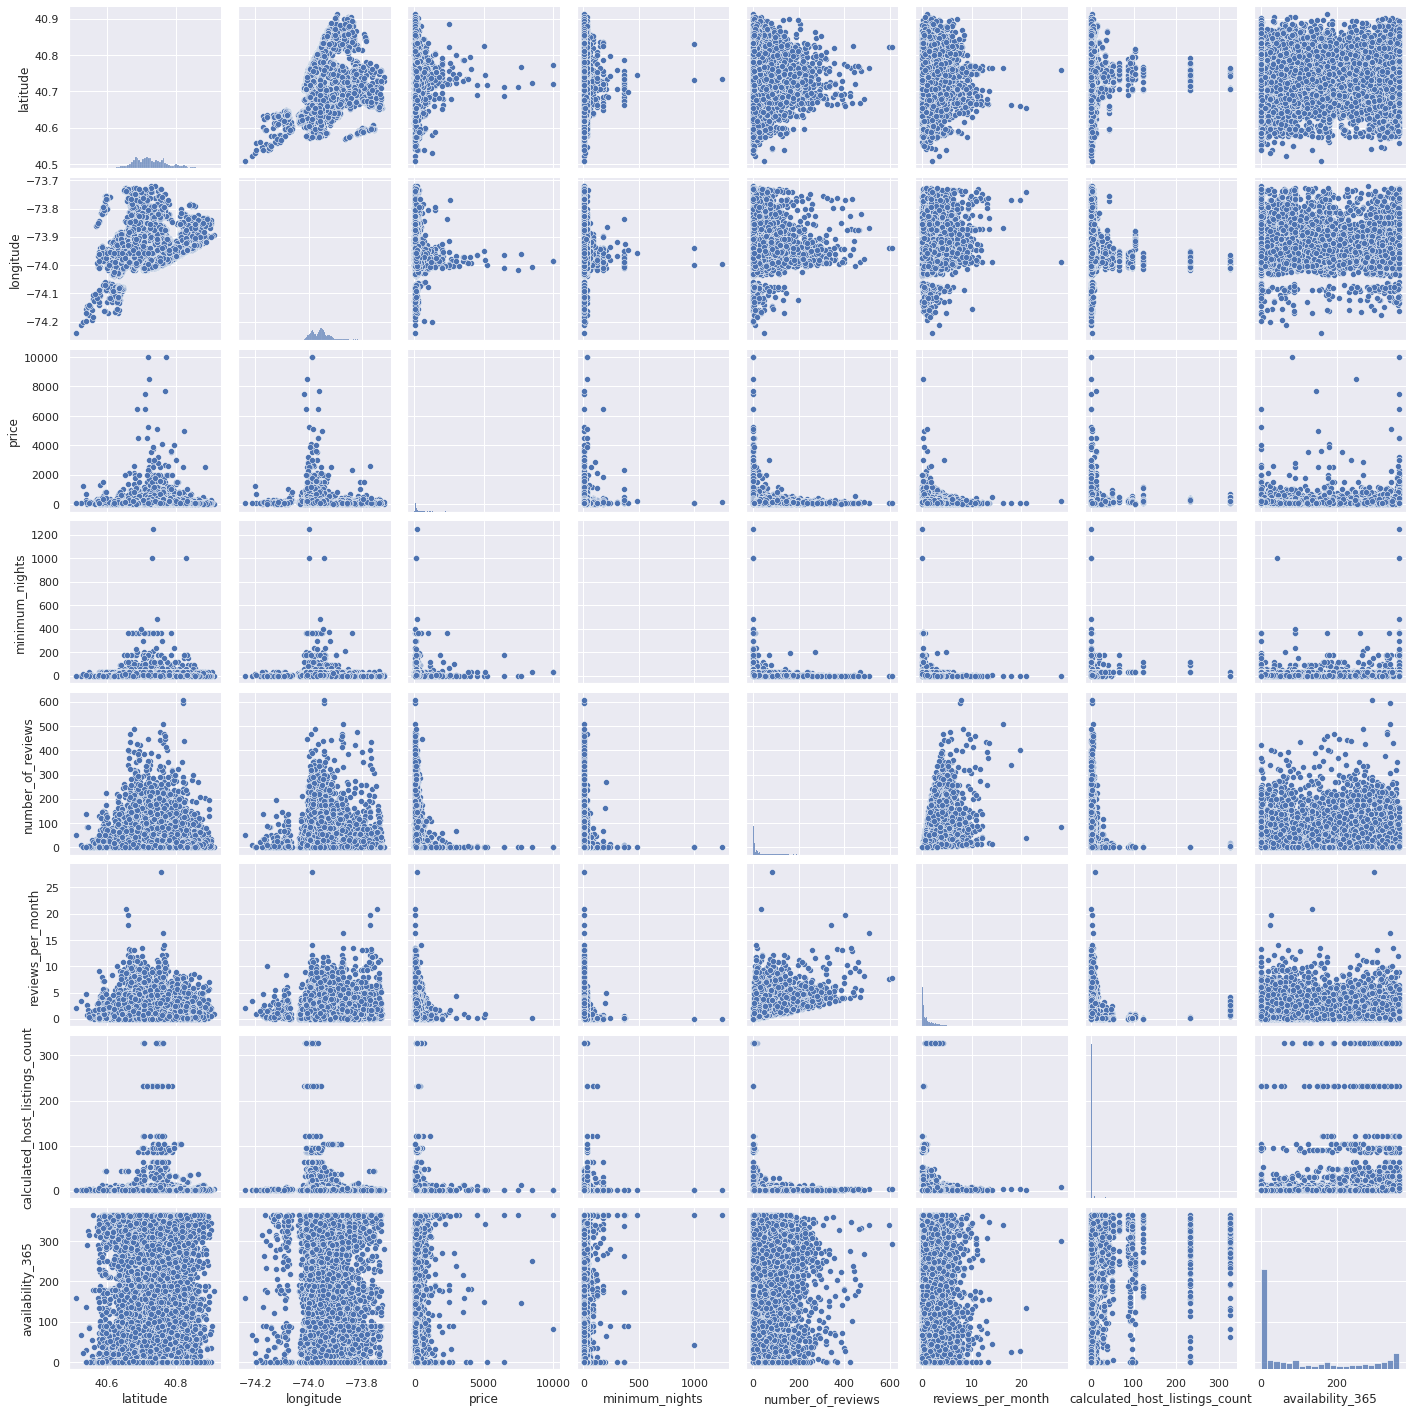

In [9]:
sns.pairplot(df[numeric_columns]);

#### Categorical data

In [10]:
df.describe(exclude=[np.number])

/tmp/ipykernel_436/2684435253.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(exclude=[np.number])


,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review
count,19993,19992,20000,20000,20000,15877
unique,19768,6517,5,217,3,1507
top,Brooklyn Apartment,David,Manhattan,Williamsburg,Entire home/apt,2019-06-23 00:00:00
freq,7,170,8774,1580,10384,575
first,NaN,NaN,NaN,NaN,NaN,2011-05-12 00:00:00
last,NaN,NaN,NaN,NaN,NaN,2019-07-08 00:00:00


### Checking missing data

In [11]:
df_missing = df[df.isna().any(axis=1)]
df_missing.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1,31444015,TIME SQUARE CHARMING ONE BED IN HELL'S KITCHEN...,8523790,Johlex,Manhattan,Hell's Kitchen,40.76682,-73.98878,Entire home/apt,170,3,0,NaT,NaN,1,188
10,35468220,Forest Hills Charming 1 bdrm apartment!,7599704,Sasha,Queens,Forest Hills,40.72085,-73.84088,Entire home/apt,75,1,0,NaT,NaN,1,7
15,7126110,Sunny East Village Bedroom,37325763,Noah,Manhattan,East Village,40.72393,-73.98271,Private room,100,1,0,NaT,NaN,1,0
16,35005489,Exquisite Park Slope Paradise,229604812,Jake,Brooklyn,Windsor Terrace,40.65863,-73.98495,Entire home/apt,300,3,0,NaT,NaN,1,335
27,22064197,Upper West Side Central Park apartment,20153029,Tal,Manhattan,Upper West Side,40.77244,-73.98043,Entire home/apt,190,7,0,NaT,NaN,1,0


In [12]:
df_missing[df_missing['number_of_reviews'] != 0]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2180,1449546,Cozy Studio in Flatbush,7779204,NaN,Brooklyn,Flatbush,40.64965,-73.96154,Entire home/apt,100,30,49,2017-01-02,0.69,1,342
3872,22275821,NaN,49662398,Kathleen,Brooklyn,Bushwick,40.69546,-73.92741,Entire home/apt,110,4,5,2018-08-13,0.27,1,0
7059,12113879,"Sunny, Large West Village 1 BR Near Everything",5300585,NaN,Manhattan,Chelsea,40.73949,-73.99801,Entire home/apt,220,4,81,2019-07-02,2.11,1,217
7420,6360224,"Sunny, Private room in Bushwick",33134899,NaN,Brooklyn,Bushwick,40.70146,-73.92792,Private room,37,1,1,2015-07-01,0.02,1,0
9692,10052289,NaN,49522403,Vanessa,Brooklyn,Brownsville,40.66409,-73.92314,Private room,50,3,3,2016-08-18,0.07,1,362
11359,23660605,Private Bedroom w/ Balcony view of Central Park,177146433,NaN,Manhattan,East Harlem,40.79766,-73.94824,Private room,139,1,6,2018-08-12,0.46,1,0
17161,6786181,R&S Modern Spacious Hideaway,32722063,NaN,Brooklyn,East Flatbush,40.64345,-73.93643,Entire home/apt,100,2,157,2019-06-19,3.18,2,342
19452,7556587,Sunny Room in Harlem,39608626,NaN,Manhattan,Harlem,40.82929,-73.94182,Private room,28,1,1,2015-08-01,0.02,1,0
19906,21901156,Best Deal! Lovely place in Manhattan! Time Squ...,159156636,NaN,Manhattan,Hell's Kitchen,40.75656,-73.99063,Private room,120,1,109,2019-01-01,5.97,3,0


### Fixing outliers in price feature

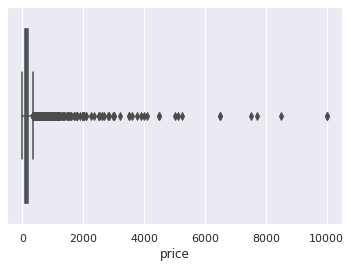

In [13]:
sns.boxplot(x=df['price']);

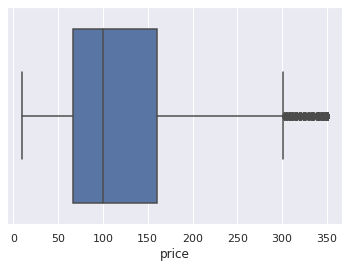

In [14]:
sns.boxplot(x=df[df['price'].between(10, 350)]['price']);

### Final check

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              20000 non-null  int64         
 1   name                            19993 non-null  object        
 2   host_id                         20000 non-null  int64         
 3   host_name                       19992 non-null  object        
 4   neighbourhood_group             20000 non-null  object        
 5   neighbourhood                   20000 non-null  object        
 6   latitude                        20000 non-null  float64       
 7   longitude                       20000 non-null  float64       
 8   room_type                       20000 non-null  object        
 9   price                           20000 non-null  int64         
 10  minimum_nights                  20000 non-null  int64         
 11  nu

In [16]:
run.finish()